
#Calories Burnt Prediction

This project aims to build a **machine learning model** to predict the number of calories burnt based on physiological and activity-related features.  

###Objectives:
- Load and explore the dataset
- Perform data preprocessing
- Apply feature engineering
- Train multiple ML models
- Evaluate performance metrics
- Select the best model for calorie prediction


## 1. Importing Required Libraries

We start by importing the essential Python libraries for data analysis, visualization, and machine learning.  

- `pandas`, `numpy` → Data manipulation  
- `matplotlib`, `seaborn` → Visualization  
- `scikit-learn` → ML algorithms, preprocessing, metrics


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

## 2. Loading the Dataset

We load the calories dataset into a pandas DataFrame and check the first few rows.  

This helps us:
- Understand the structure of the data
- Identify available features (independent variables)
- Check the target variable (`Calories`)


In [3]:
calorie_data = pd.read_csv('/content/calories.csv')
calorie_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exercise_data = pd.read_csv('/content/exercise.csv')
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:
calories_data = pd.concat([exercise_data , calorie_data['Calories']], axis=1)

In [6]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [7]:
calories_data.shape

(15000, 9)

## 3. Exploratory Data Analysis (EDA)

Here, we perform an initial exploration of the dataset.  

- Use `.info()` and `.describe()` for dataset summary  
- Check for **missing values**  
- Explore **data types** of features  
- Understand **distribution** of key features (like Age, Height, Weight, Duration)  


In [8]:
calories_data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [9]:
calories_data.duplicated().sum()

np.int64(0)

In [10]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [11]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [12]:
calories_data=calories_data.drop(columns='User_ID' , axis=1)
calories_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


## 4. Data Visualization 📊

Visualize key aspects of the dataset:  

- **Histograms** to check distributions  
- **countplot** to detect outliers  
- **Correlation heatmap** to identify relationships among features  


In [13]:
sns.set()

<Axes: xlabel='Gender', ylabel='count'>

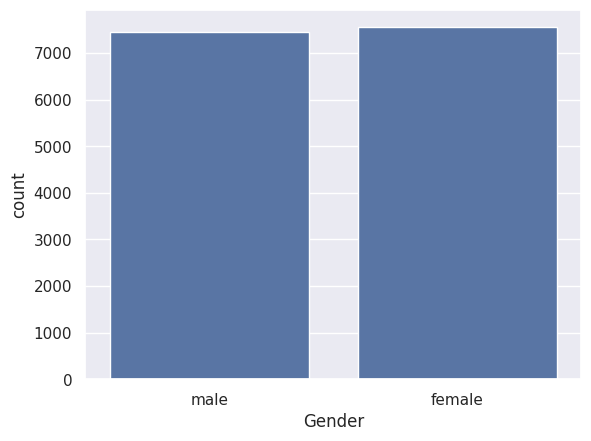

In [14]:
sns.countplot(x='Gender' , data=calories_data)

<Axes: xlabel='Age', ylabel='Count'>

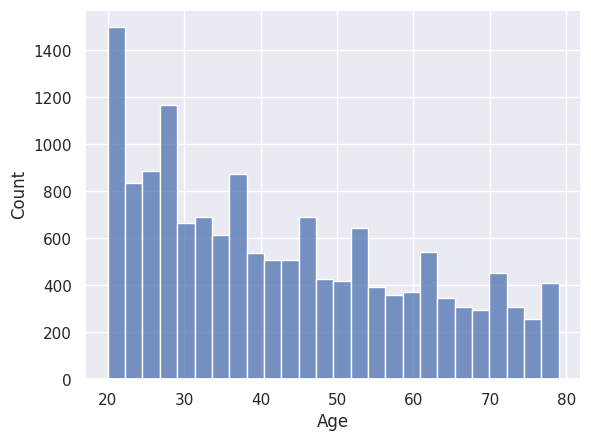

In [15]:
sns.histplot(calories_data['Age'])

/tmp/ipython-input-2430521470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

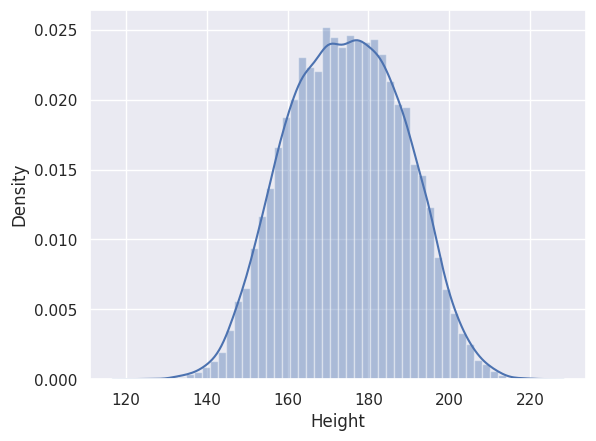

In [16]:
sns.distplot(calories_data['Height'])

<Axes: xlabel='Weight', ylabel='Count'>

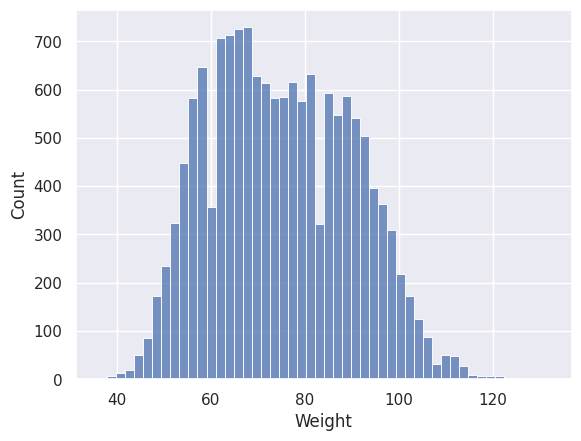

In [17]:
sns.histplot(calories_data['Weight'])

<Axes: xlabel='Body_Temp', ylabel='Count'>

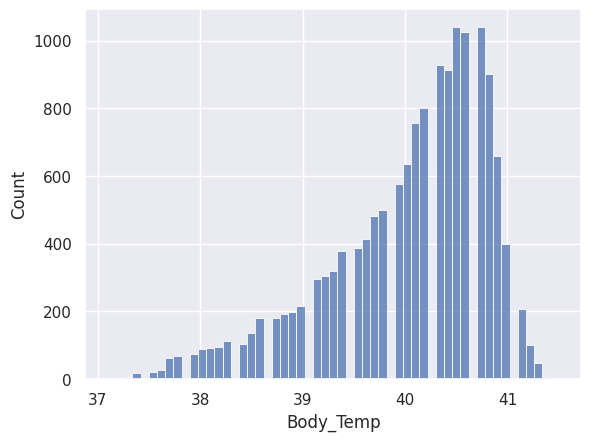

In [18]:
sns.histplot(calories_data['Body_Temp'])

<Axes: xlabel='Heart_Rate', ylabel='Count'>

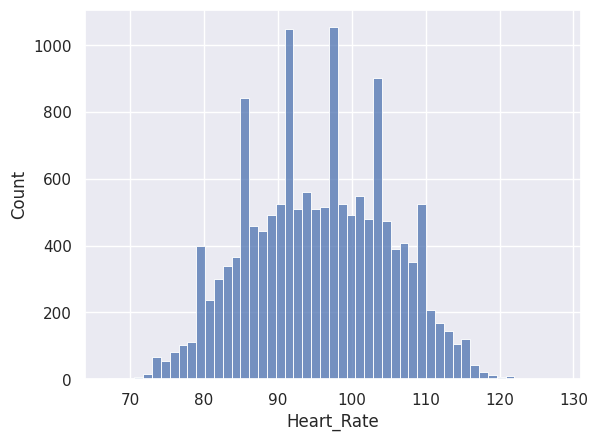

In [19]:
sns.histplot(calories_data['Heart_Rate'])

<Axes: xlabel='Duration', ylabel='Count'>

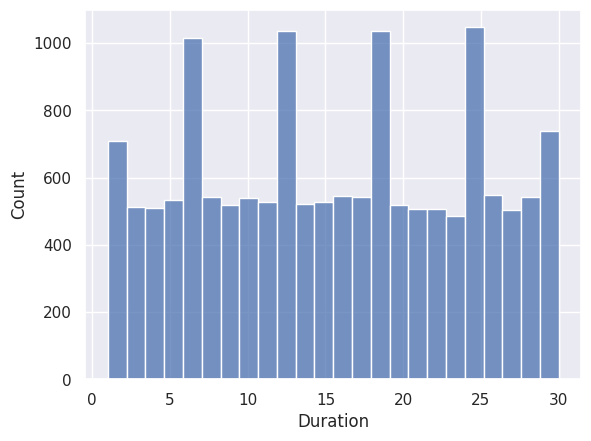

In [20]:
sns.histplot(calories_data['Duration'])

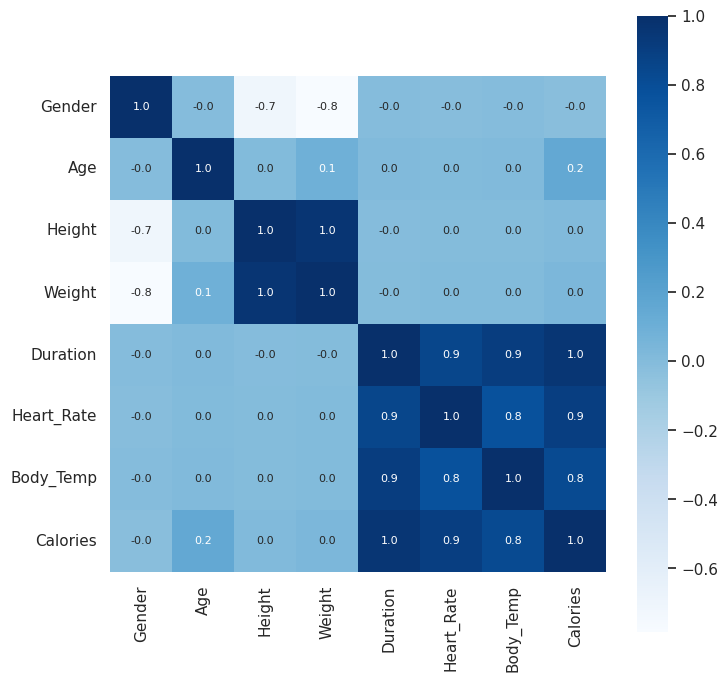

In [47]:
corr = calories_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr , cbar=True , square=True , fmt='.1f' , annot=True , annot_kws=({'size': 8}) , cmap='Blues' )
plt.show()

## 5. Data Preprocessing

Steps include:  
- Handling missing values (if any)  
- Encoding categorical variables (e.g., Gender → 0/1)  
- Scaling numerical features for uniformity  
- Splitting the dataset into training and testing sets


In [21]:
calories_data=calories_data.replace({'Gender' : { 'male': 0 ,'female': 1}})
calories_data.head()

/tmp/ipython-input-755000838.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data=calories_data.replace({'Gender' : { 'male': 0 ,'female': 1}})


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [23]:
X= calories_data.drop(columns='Calories', axis=1)
y=calories_data['Calories']

In [26]:
print(X , y)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns] 0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999   

In [33]:
X_train , X_test , y_train , y_test = train_test_split(X ,y , test_size=0.1 , random_state=42)

In [34]:
print(X.shape , X_train.shape , X_test.shape)

(15000, 7) (13500, 7) (1500, 7)


## 6. Model Building 🤖

Train different machine learning models for calorie prediction, such as:  
- Linear Regression  
- Decision Tree Regressor  
- Random Forest Regressor  
- Gradient Boosting Regressor  

Here used XGBoost algorithm


In [35]:
model = XGBRegressor()

In [36]:
model.fit(X_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

## 7. Model Evaluation 📈

We evaluate model performance using metrics such as:  
- Mean Absolute Error (MAE)  
- R² Score (Coefficient of Determination)  

This allows us to identify which model generalizes best for predicting calories burnt.


In [41]:
X_train_prediction = model.predict(X_train)
error_score=metrics.r2_score(y_train , X_train_prediction)
print("The R Squared Error on training data is :" , error_score)

The R Squared Error on training data is : 0.9995593910818679


In [42]:
X_test_prediction = model.predict(X_test)
error_score=metrics.r2_score(y_test , X_test_prediction)
print("The R Squared Error on training data is :" , error_score)

The R Squared Error on training data is : 0.998878145771502


In [43]:
print(X_test_prediction)

[170.59294 193.52245  51.89149 ...  57.27433 131.21155 132.72382]


In [46]:
mae=metrics.mean_absolute_error(y_test , X_test_prediction)
print("The Mean Absoulte Error value is :" , mae)

The Mean Absoulte Error value is : 1.4718723805745442


## 9. Final Results & Insights

- The best performing model is XGBoost with an R² score of 99%.  
- Key insights:  
  - Weight and Duration strongly influence calories burnt  
  - Gender has a moderate effect  
  - Age shows a weaker correlation  

This model can be used in fitness apps to estimate calorie burn during workouts.


## 10. Conclusion

In this project, we successfully:  
- Explored and preprocessed the dataset  
- Visualized important trends and correlations  
- Built multiple regression models  
- Identified the best-performing model  

This approach can be extended to **personalized fitness tracking** and integrated into **health monitoring systems**.
